In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("framingham.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print(count, round((count/len(df.index))*100))

582 14


In [5]:
df = df.dropna(how='any', axis=0)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

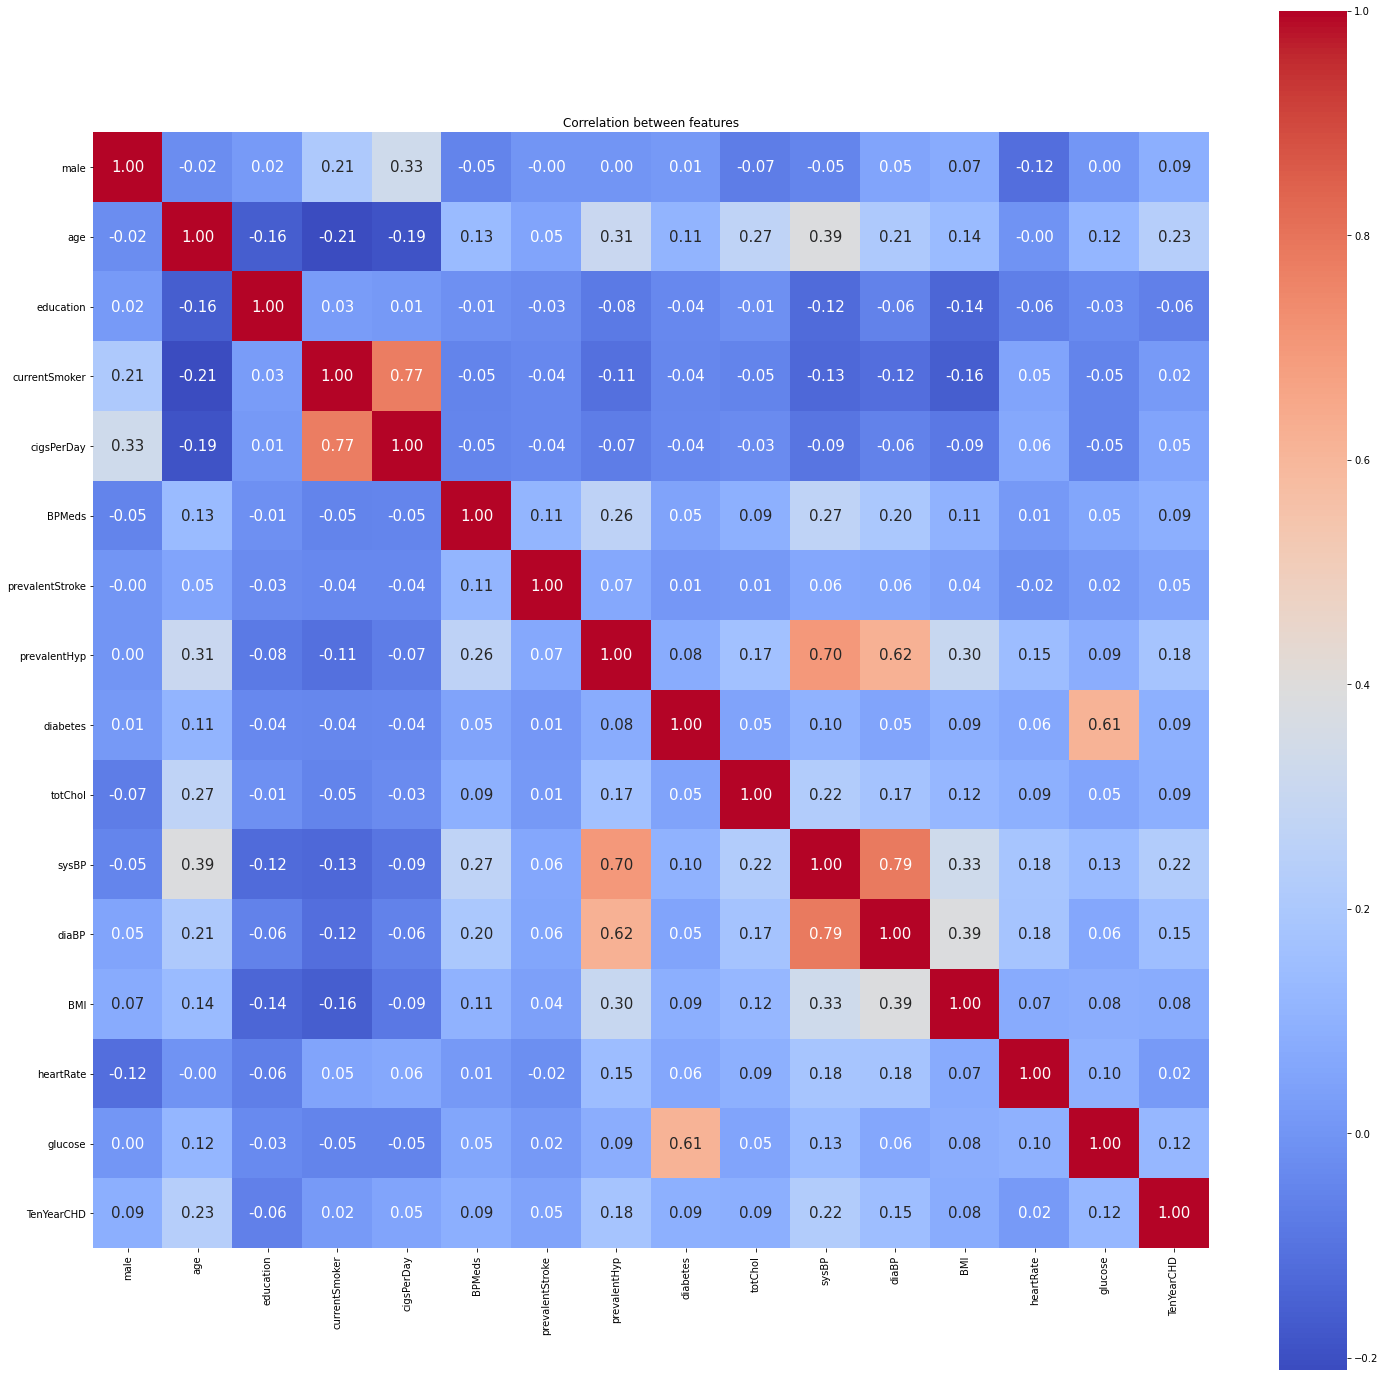

In [6]:
#Correlation
df_corr = df.corr()

plt.figure(figsize=(25,25))
sns.heatmap(df_corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws={'size':15}, cmap='coolwarm')
plt.title('Correlation between features');

In [7]:
#df=df.drop(['sysBP'], axis=1)

y = df['TenYearCHD']

X = df.drop(['TenYearCHD'], axis=1)

In [8]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [9]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [51]:
#MACHINE LEARNING ALGORITHMS

In [10]:
# Importing modules
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold

In [11]:
# k-folding and train input model type
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output])
    predictions = model.predict(data[prediction_input])
    accuracy = accuracy_score(predictions,data[output])
  
    kf = KFold(n_splits=5, shuffle=True)
    error = []
    for train, test in kf.split(data):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
  
    return accuracy, error

In [12]:
# variables
prediction_var = list(X.columns)
outcome_var= 'TenYearCHD'

In [13]:
# Support Vector Machines
model_1 = SVC()
accuracy, error = classification_model(model_1,df,prediction_var,outcome_var)
svm_score = round(accuracy * 100, 2)
svm_testscore = round(np.mean(error) * 100, 2)

In [14]:
print('Support Vector Machines Score: \n', svm_score)

Support Vector Machines Score: 
 84.86


In [15]:
print('Support Vector Machines Test Score: \n', svm_testscore)

Support Vector Machines Test Score: 
 84.69


In [16]:
# K Nearest Neighbors
model_2 = KNeighborsClassifier()
accuracy, error = classification_model(model_2,df,prediction_var,outcome_var)
k_near_score = round(accuracy * 100, 2)
k_near_testscore = round(np.mean(error) * 100, 2)

In [17]:
print('K Nearest Neighbors Score: \n', k_near_score)

K Nearest Neighbors Score: 
 86.85


In [18]:
print('K Nearest Neighbors Test Score: \n', k_near_testscore)

K Nearest Neighbors Test Score: 
 83.62


In [19]:
# GaussianNB
model_3 = GaussianNB()
accuracy, error = classification_model(model_3,df,prediction_var,outcome_var)
gauss_score = round(accuracy * 100, 2)
gauss_testscore = round(np.mean(error) * 100, 2)

In [20]:
print('Gaussian NB Score: \n', gauss_score)

Gaussian NB Score: 
 82.31


In [21]:
print('Gaussian NB Test Score: \n', gauss_testscore)

Gaussian NB Test Score: 
 82.31


In [22]:
# Decision Trees
model_4 = DecisionTreeClassifier()
accuracy, error = classification_model(model_4,df,prediction_var,outcome_var)
decision_tree_score = round(accuracy * 100, 2)
decision_tree_testscore = round(np.mean(error) * 100, 2)

In [23]:
print('Decision Trees Score: \n', decision_tree_score)

Decision Trees Score: 
 100.0


In [24]:
print('Decision Trees Test Score: \n', decision_tree_testscore)

Decision Trees Test Score: 
 76.44


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 2472, 1: 454}

In [33]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.columns = le.fit_transform(df.columns)
df.columns

Int64Index([11, 3, 8, 5, 4, 1, 13, 12, 7, 15, 14, 6, 0, 10, 9, 2], dtype='int64')